# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests 
import re
import json
import os 
import tweepy
from tweepy import OAuthHandler
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
twitter_archive = pd.read_csv(r'twitter-archive-enhanced.csv')
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

image_predictions.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
data_tweet = pd.read_json(r'tweet_jason.txt',lines=True)
data_tweet.head(4)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661...,13,10,None,None,None,pupper,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10,10,Sophie,None,None,None,None
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None


In [7]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
twitter_archive.duplicated().sum()

0

In [9]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
866,697482927769255936,https://pbs.twimg.com/media/Ca31BTgWwAA4uNU.jpg,1,bath_towel,0.110587,False,Christmas_stocking,0.108573,False,weasel,0.105442,False
1748,823581115634085888,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,dingo,0.280949,False,German_shepherd,0.194044,True,Pembroke,0.120051,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
832,693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,washbasin,0.272451,False,doormat,0.165871,False,bathtub,0.066368,False
1318,755955933503782912,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1,Pekinese,0.596882,True,Maltese_dog,0.176478,True,Great_Pyrenees,0.026775,True


In [12]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
image_predictions.duplicated().sum()

0

In [14]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [15]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [16]:
image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [17]:
image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [18]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [19]:
data_tweet.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2282,NaN,NaN,2015-11-19 04:05:59,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667192061259620352, 'id_str'...",414,False,*takes several long deep breaths* omg omg oMG ...,NaN,...,0.0,NaN,NaN,NaN,115,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1853,NaN,NaN,2015-12-12 04:23:49,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675531466269286400, 'id_str'...",1276,False,This is Ellie AKA Queen Slayer of the Orbs. Ve...,NaN,...,0.0,NaN,NaN,NaN,428,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
303,NaN,NaN,2017-02-28 01:00:19,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 836380472099897348, 'id_str'...",16037,False,This is Ava. She just blasted off. Streamline ...,NaN,...,0.0,NaN,NaN,NaN,3337,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
54,NaN,NaN,2017-07-02 21:58:53,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,129,False,@roushfenway These are good dogs but 17/10 is ...,NaN,...,NaN,NaN,NaN,NaN,7,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
285,NaN,NaN,2017-03-06 19:21:35,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Riley. His owner put a ...,NaN,...,NaN,NaN,NaN,NaN,12643,False,{'created_at': 'Thu Oct 06 01:23:05 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [20]:
data_tweet.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [21]:
data_tweet['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
twitter_archive_copy = twitter_archive.copy()
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Quality issues
1.The missing values in some cloumns. 
2.The ID column ha to be named 'tweet_id' as the others data have ,and dtype has to be string , sourse change data type to category.

3.Some columns that contain unnecessary data such as in_reply_to_user_id_str ... just need id,retweet_count,favorite_count

4.The source mixed html tag ,Rewrite the tweet source, from iphone ,web...etc


### Tidiness issues
1.The four different columns doggo, floofer, pupper and puppo, combine in one columns represent stages_of_dogs" doggo|floofer|pupper|puppo




### Quality issues:

### Defin

# Incorrected datatypes on tweet-id and timestamp tweet_id, timestamp
 

###  Code

In [23]:
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

In [24]:
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy.rename(columns={"timestamp":'tweet_date'},inplace=True)

### Test

In [25]:
print (twitter_archive_copy['tweet_id'].dtypes)
print (twitter_archive_copy['tweet_date'].dtypes)

object
datetime64[ns]


In [26]:
twitter_archive_copy.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


### Defin

drop unnessary columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp ,source ..


# Code

In [27]:
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
twitter_archive_copy.drop(drop_columns, axis=1,inplace = True)

### Test

In [28]:
twitter_archive_copy.head(4)

,tweet_id,tweet_date,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None


### Tidiness Isuue


 ### Defin

The four different columns doggo, floofer, pupper and puppo, combine in one columns represent stages_of_dogs" doggo|floofer|pupper|puppo

### code

In [29]:
twitter_archive_copy['stages_of_dogs'] = twitter_archive_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [30]:
twitter_archive_copy= twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [31]:
twitter_archive_copy['stages_of_dogs'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

In [32]:
twitter_archive_copy.sample(5)

,tweet_id,tweet_date,text,name,stages_of_dogs
1445,696518437233913856,2016-02-08 02:18:30,Oh my god 10/10 for every little hot dog pupper,None,pupper
1400,699446877801091073,2016-02-16 04:15:05,This is Archie. He's undercover in all these p...,Archie,NaN
2004,672466075045466113,2015-12-03 17:23:00,This is Franq and Pablo. They're working hard ...,Franq,NaN
1484,693231807727280129,2016-01-30 00:38:37,"This is Bodie. He's not proud of what he did, ...",Bodie,NaN
1577,687399393394311168,2016-01-13 22:22:41,This is Barry. He's very fast. I hope he finds...,Barry,NaN


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
image_predictions_copy = image_predictions.copy()
image_predictions_copy.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


### Issue #1:

#### Define: tweet_idf should be string type


#### Code

In [34]:
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype('str')

#### Test

In [35]:
print(image_predictions_copy['tweet_id'].dtype)

object


### Issue #2:

#### Define The types of dogs in columns p1, p2, and p3 have some uppercase \ lowercase letters, change lowercase


#### Code

In [36]:
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.lower()

In [37]:
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.lower()

In [38]:
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.lower()

#### Test

In [39]:
image_predictions_copy['p1'].head()

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [40]:
image_predictions_copy['p2'].head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [41]:
image_predictions_copy['p3'].head()

0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

### Tidiness Issues

### Defin

extract breed of dog from columns p, p_conf and p_dog

### Code

In [42]:
def extr_dog(r):
        is_bread = False
        conf_br = 0
        nama_br = ''
        if(r.p1_dog == True):
            if(r.p1_conf >= True):
                conf_br = r.p1_conf
                name_br = r.p1
                is_bread = True
        if(r.p2_dog == True):
            if(r.p2_conf >= conf_br):
                conf_br = r.p2_conf
                name_br =r.p2
                is_bread = True
        if(r.p3_dog == True):
            if(r.p3_conf >= conf_br):
                conf_br = r.p3_conf
                name_br =r.p3
                is_bread = True
        if is_bread == False:
            return np.nan
        else:
            return name_br
image_predictions_copy['breed'] = image_predictions_copy.apply(extr_dog,axis=1)

In [43]:
drop_columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
image_predictions_copy.drop(drop_columns, axis=1,inplace = True)

### Test

In [44]:
image_predictions_copy.head(4)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,miniature_pinscher
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,malinois
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,redbone


In [45]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed       1708 non-null object
dtypes: int64(1), object(3)
memory usage: 64.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
data_tweet_copy = data_tweet.copy()
data_tweet_copy.head(4)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Quality Issues

# Defin

id_str column should named 'tweet_id' as the others data have , sourse change data type to category

# Code

In [47]:
data_tweet_copy.rename(columns={'id_str':'tweet_id'},inplace=True)

# Test

In [48]:
data_tweet_copy.head(4)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [49]:
data_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
tweet_id                         2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

### Defin

'tweet_id' dtype should be string , 'sourse' change data type to category

### Code

In [50]:
data_tweet_copy['tweet_id'] = data_tweet_copy['tweet_id'].astype('str')

In [51]:
data_tweet_copy['source'] = data_tweet_copy['source'].astype('category')

### Test

In [52]:
print(data_tweet_copy['tweet_id'].dtype)
print(data_tweet_copy['source'].dtype)

object
category


In [53]:
data_tweet_copy.tweet_id.duplicated().sum()

0

### Defin

some columns that contain unnecessary data such as in_reply_to_user_id_str ... just need id,retweet_count,favorite_count

# Code

In [54]:
data_tweet_copy.drop(columns=['created_at','full_text','truncated','display_text_range','entities'
    ,'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
     ,'in_reply_to_screen_name','user','geo','coordinates','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'
    ,'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],inplace=True)

# Test

In [55]:
data_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
source            2354 non-null category
dtypes: category(1), int64(3), object(1)
memory usage: 76.1+ KB


In [56]:
data_tweet_copy.isnull().sum()

favorite_count    0
id                0
tweet_id          0
retweet_count     0
source            0
dtype: int64

In [57]:
data_tweet_copy.head()

,favorite_count,id,tweet_id,retweet_count,source
0,39467,892420643555336193,892420643555336192,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,33819,892177421306343426,892177421306343424,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,25461,891815181378084864,891815181378084864,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,42908,891689557279858688,891689557279858688,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,41048,891327558926688256,891327558926688256,9774,"<a href=""http://twitter.com/download/iphone"" r..."


### Defin

# source mixed html tag,Rewrite the tweet source, from iphone,..etc


### Code

In [58]:
data_tweet_copy['source'] = data_tweet_copy["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

### Test

In [59]:
data_tweet_copy['source'].value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [60]:
data_tweet_copy.head(3)

,favorite_count,id,tweet_id,retweet_count,source
0,39467,892420643555336193,892420643555336192,8853,Twitter for iPhone
1,33819,892177421306343426,892177421306343424,6514,Twitter for iPhone
2,25461,891815181378084864,891815181378084864,4328,Twitter for iPhone


In [61]:
merge_df = pd.merge(twitter_archive_copy,data_tweet_copy , on='tweet_id' , how ='left')
merge_df.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,retweet_count,source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,25461.0,8.918152e+17,4328.0,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,42908.0,8.916896e+17,8964.0,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,41048.0,8.913276e+17,9774.0,Twitter for iPhone


In [62]:
merge_df = pd.merge(merge_df,image_predictions_copy,on='tweet_id',how='left')
merge_df.head(5)

,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,retweet_count,source,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,25461.0,8.918152e+17,4328.0,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,42908.0,8.916896e+17,8964.0,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,41048.0,8.913276e+17,9774.0,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer


In [63]:
merge_df.breed.unique()

array([nan, 'pekinese', 'malamute', 'labrador_retriever',
       'english_springer', 'irish_terrier', 'border_collie', 'eskimo_dog',
       'irish_setter', 'cardigan', 'pomeranian', 'boxer', 'borzoi',
       'tibetan_mastiff', 'rhodesian_ridgeback', 'pug', 'redbone',
       'weimaraner', 'toy_terrier', 'great_pyrenees', 'chihuahua',
       'shih-tzu', 'siberian_husky', 'american_staffordshire_terrier',
       'norwich_terrier', 'french_bulldog', 'malinois',
       'miniature_pinscher', 'chesapeake_bay_retriever',
       'golden_retriever', 'afghan_hound', 'clumber', 'beagle', 'vizsla',
       'boston_bull', 'whippet', 'collie', 'welsh_springer_spaniel',
       'italian_greyhound', 'saint_bernard', 'pembroke',
       'staffordshire_bullterrier', 'miniature_poodle',
       'black-and-tan_coonhound', 'bloodhound', 'sussex_spaniel',
       'flat-coated_retriever', 'briard', 'appenzeller', 'kuvasz',
       'papillon', 'groenendael', 'airedale', 'cocker_spaniel',
       'bouvier_des_flandres

In [64]:
merge_df.stages_of_dogs.nunique()

4

In [65]:
merge_df.source.nunique()

4

In [66]:
merge_df_clean = merge_df.copy()

In [67]:
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id          2356 non-null object
tweet_date        2356 non-null datetime64[ns]
text              2356 non-null object
name              2356 non-null object
stages_of_dogs    399 non-null object
favorite_count    1518 non-null float64
id                1518 non-null float64
retweet_count     1518 non-null float64
source            1518 non-null object
jpg_url           2075 non-null object
img_num           2075 non-null float64
breed             1708 non-null object
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 239.3+ KB


In [68]:
merge_df_clean.tweet_id.duplicated().sum()

0

In [69]:
merge_df_clean.head(4)

,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,retweet_count,source,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,25461.0,8.918152e+17,4328.0,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,42908.0,8.916896e+17,8964.0,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever


In [70]:
merge_df_clean.sample(6)

,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,retweet_count,source,jpg_url,img_num,breed
1123,730427201120833536,2016-05-11 15:59:50,This is Crystal. She's flawless. Really wants ...,Crystal,NaN,3809.0,7.304272e+17,1176.0,Twitter for iPhone,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,1.0,siberian_husky
271,841077006473256960,2017-03-13 00:02:39,This is Dawn. She's just checking pup on you. ...,Dawn,NaN,24926.0,8.410770e+17,5991.0,Twitter for iPhone,https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg,1.0,blenheim_spaniel
2075,670840546554966016,2015-11-29 05:43:44,Meet Colby. He's that one cool friend that get...,Colby,NaN,634.0,6.708405e+17,213.0,Twitter for iPhone,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1.0,lhasa
346,831926988323639298,2017-02-15 18:03:45,@UNC can confirm 12/10,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,704859558691414016,2016-03-02 02:43:09,Here is a heartbreaking scene of an incredible...,a,pupper,2462.0,7.048596e+17,612.0,Twitter for iPhone,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1.0,NaN
558,803321560782307329,2016-11-28 19:35:59,RT @dog_rates: This is Philbert. His toilet br...,Philbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id          2356 non-null object
tweet_date        2356 non-null datetime64[ns]
text              2356 non-null object
name              2356 non-null object
stages_of_dogs    399 non-null object
favorite_count    1518 non-null float64
id                1518 non-null float64
retweet_count     1518 non-null float64
source            1518 non-null object
jpg_url           2075 non-null object
img_num           2075 non-null float64
breed             1708 non-null object
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 239.3+ KB


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
merge_df_clean.head(6)

,tweet_id,tweet_date,text,name,stages_of_dogs,favorite_count,id,retweet_count,source,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,pekinese
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,25461.0,8.918152e+17,4328.0,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,malamute
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,42908.0,8.916896e+17,8964.0,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,41048.0,8.913276e+17,9774.0,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,english_springer
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,NaN,20562.0,8.910880e+17,3261.0,Twitter for iPhone,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,irish_terrier


In [73]:
merge_df_clean.describe()

,favorite_count,id,retweet_count,img_num
count,1518.000000,1.518000e+03,1518.000000,2075.000000
mean,7752.137681,7.386500e+17,2971.322134,1.203855
std,10966.529752,6.699942e+16,4867.362390,0.561875
min,0.000000,6.660293e+17,2.000000,1.000000
25%,1405.250000,6.767853e+17,607.250000,1.000000
50%,3558.500000,7.145456e+17,1389.000000,1.000000
75%,9629.000000,7.904331e+17,3493.500000,1.000000
max,107015.000000,8.918152e+17,56625.000000,4.000000


In [74]:
merge_df_clean['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
an              7
Toby            7
Daisy           7
Buddy           7
Rusty           6
Jax             6
Scout           6
Dave            6
Koda            6
Bella           6
Stanley         6
Jack            6
Oscar           6
Leo             6
Milo            6
Sunny           5
             ... 
Ralpher         1
Yoda            1
Snoopy          1
Dobby           1
Banditt         1
Blu             1
Katie           1
Kulet           1
Iroh            1
Rumble          1
Erik            1
Ozzie           1
Amélie          1
Dixie           1
Glenn           1
Derby           1
Norman          1
Holly           1
Jazz            1
Anna            1
Cilantro        1
Christoper      1
Lilah           1
Daniel          1
Skittle   

In [75]:
merge_df_clean['stages_of_dogs'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

In [76]:
merge_df_clean.to_csv('twitter_archive_master_.csv',index=False)

### Insights:
1.What the most source was used?

2.What are the most stage of doges?

3.What the 6 frequent bread was?
4.comparison between the favorite counts & retweet counts?
5.How many number of Tweets per month do we have?

### Visualization

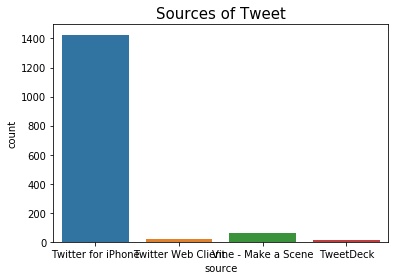

In [77]:
plt.title('Sources of Tweet', size=15)
sns.countplot(data=merge_df_clean, x='source')

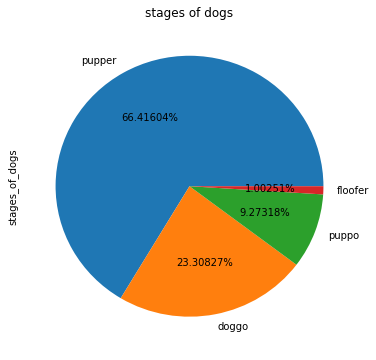

In [78]:
merge_df_clean.stages_of_dogs.value_counts().plot.pie(figsize=(6,6), autopct='%.5f%%')
plt.title('stages of dogs')
plt.show()

In [79]:
merge_df_clean['breed'].value_counts()[0:7].sort_values(ascending=False)

labrador_retriever          110
golden_retriever            103
cardigan                     76
chihuahua                    50
pomeranian                   49
toy_poodle                   45
chesapeake_bay_retriever     44
Name: breed, dtype: int64

Text(0.5,1,'Top 7 frequent dog breed')

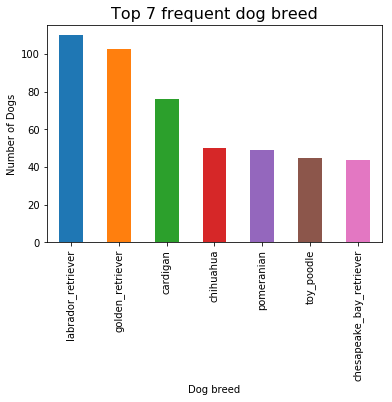

In [80]:

merge_df_clean['breed'].value_counts()[0:7].sort_values(ascending=False).plot(kind ='bar')
plt.xlabel('Dog breed')
plt.ylabel('Number of Dogs')
plt.title('Top 7 frequent dog breed', size=16)

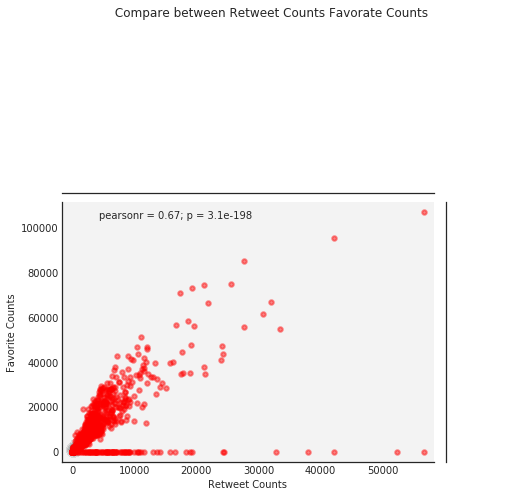

In [81]:
sns.set_style('white')
compare= sns.jointplot(data=merge_df_clean,x="retweet_count", y="favorite_count",kind="kde", color="white", size=7)
compare.plot_joint(plt.scatter, marker=".",s=80,alpha=0.45, c="red", linewidth=2)
compare.fig.subplots_adjust(top=0.7)
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.suptitle(' Compare between Retweet Counts Favorate Counts', Fontsize =12);

In [82]:
data= merge_df_clean['tweet_id'].groupby([merge_df['tweet_date'].dt.month, merge_df['tweet_date'].dt.year]).count()
data.head()

tweet_date  tweet_date
1           2016          194
            2017           94
2           2016          125
            2017           88
3           2016          137
Name: tweet_id, dtype: int64

Text(0,0.5,'Number of Tweets')

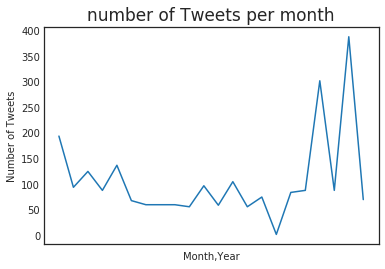

In [83]:
data.plot.line()
plt.title('number of Tweets per month', size=17)
plt.xlabel('Month,Year')
plt.ylabel('Number of Tweets')